In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2898   | 7.327     | 7.034     | 0.958     |
| 3         | -0.2388   | 2.479     | 9.194     | 2.697     |
| 8         | -0.179    | 0.2327    | 9.286     | 2.18      |
| 61        | -0.1745   | 0.01      | 10.0      | 2.547     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 2.5467941353916084}
-
## Chance of nonscaling delay ##


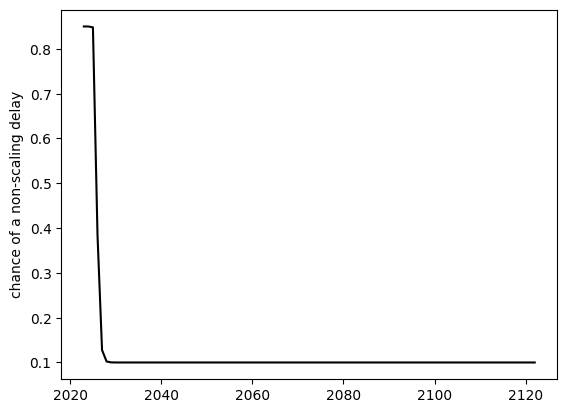

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.85),
                     (2027, 0.7),
                     (2030, 0.3),
                     (2035, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.3437   | 2.917     | 8.122     | 8.858     |
| 15        | -0.3322   | 1.326     | 2.25      | 2.681     |
| 18        | -0.3141   | 1.176     | 2.808     | 3.658     |
| 21        | -0.304    | 1.21      | 3.874     | 8.888     |
| 30        | -0.25     | 0.4562    | 5.091     | 1.595     |
| 37        | -0.25     | 0.04022   | 9.548     | 4.087     |
| 46        | -0.2483   | 0.01      | 4.799     | 2.732     |
| 52        | -0.09299  | 0.03585   | 4.54      | 1.11      |
| 90        | -0.08724  | 0.08998   | 6.505     | 0.9558    |
| 93        | -0.07378  | 0.0953    | 9.707     | 0.773     |
Curve params found
{'push': 0.09529877748880647,
 'shift': 9.706649424397858,
 'slope': 0.773015646713789}
-
## Chance of nonscaling delay ##


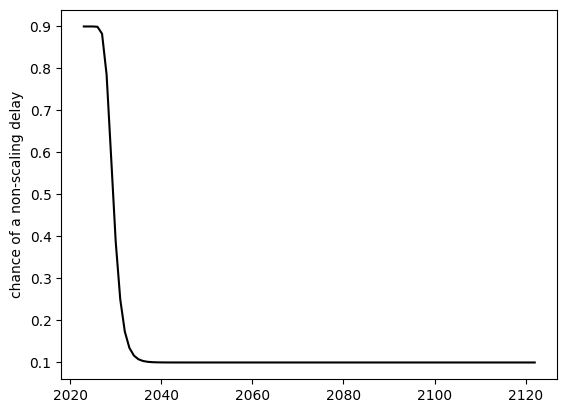

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 79%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2033

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2023, 0.9),
                     (2027, 0.7),
                     (2030, 0.5),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 6         | -0.3988   | 1.757     | 4.492     | 3.014     |
| 11        | -0.3658   | 4.713     | 3.016     | 0.6427    |
| 40        | -0.3604   | 6.227     | 5.113     | 0.629     |
| 41        | -0.3439   | 5.435     | 4.529     | 0.01      |
| 42        | -0.3432   | 4.711     | 5.033     | 0.01      |
| 45        | -0.3425   | 3.875     | 6.192     | 0.01      |
| 46        | -0.3418   | 2.895     | 8.074     | 0.01      |
| 50        | -0.3247   | 3.492     | 9.44      | 0.03236   |
| 52        | -0.2717   | 2.906     | 9.462     | 0.5706    |
| 55        | -0.2219   | 2.554     | 9.602     | 0.2201    |
| 58        | -0.2179   | 2.592     | 9.823     | 0.3743    |
| 60        | -0.2104   | 2.397     | 9.985     | 0.3986    |
| 68        | -0.1981   | 1.704     | 9.187     | 0.5434    |
| 69        | -0.1551   | 1.221     | 8.521     | 0.5202    |
| 74    

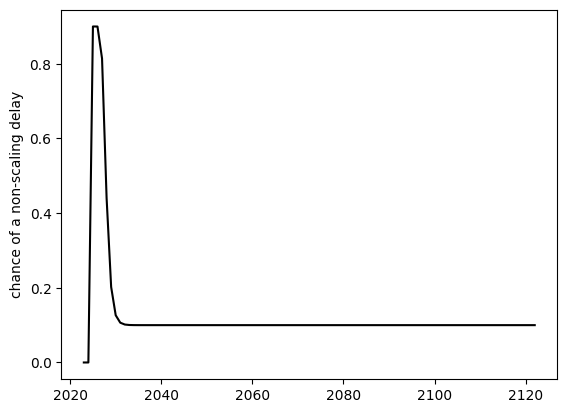

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 81%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 44%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 -

In [4]:
nonscaling_points = {'points': [(2025, 0.9),
                                (2027, 0.8),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 8         | -0.1458   | 2.719     | 3.794     | 0.4719    |
| 12        | -0.1148   | 1.621     | 6.462     | 5.624     |
| 17        | -0.1123   | 1.17      | 1.489     | 0.2558    |
| 25        | -0.09078  | 0.9941    | 7.602     | 5.38      |
| 34        | -0.08238  | 0.629     | 5.295     | 9.452     |
| 41        | -0.075    | 0.01      | 10.0      | 6.059     |
| 46        | -0.075    | 0.01      | 3.9       | 3.651     |
| 48        | -0.075    | 0.01      | 1.708     | 2.506     |
| 54        | -0.05585  | 0.01763   | 3.069     | 1.008     |
Curve params found
{'push': 0.017628284771247695,
 'shift': 3.069333806195318,
 'slope': 1.0079689982375295}
-
## Chance of nonscaling delay ##


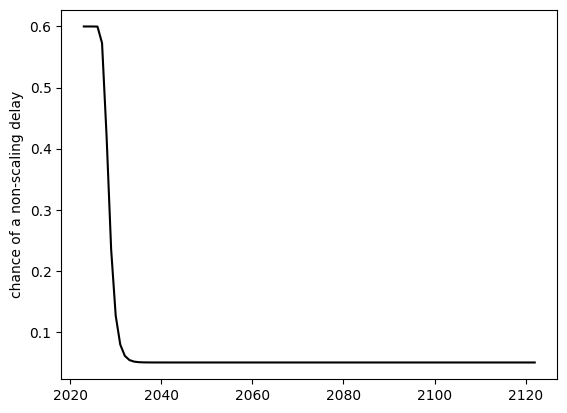

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 42%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

In [5]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.07888  | 2.691     | 6.921     | 1.073     |
| 4         | -0.05055  | 0.4443    | 7.193     | 6.155     |
| 41        | -0.03672  | 1.566     | 9.673     | 0.2969    |
| 47        | -0.03273  | 1.659     | 9.983     | 0.2552    |
| 59        | -0.03138  | 1.328     | 9.977     | 0.314     |
| 73        | -0.02699  | 1.604     | 9.693     | 0.2247    |
| 85        | -0.01731  | 1.109     | 9.208     | 0.1915    |
| 88        | -0.01307  | 0.9386    | 9.389     | 0.2267    |
Curve params found
{'push': 0.9386000010682716,
 'shift': 9.389007587677732,
 'slope': 0.22670710477857078}
-
## Chance of nonscaling delay ##


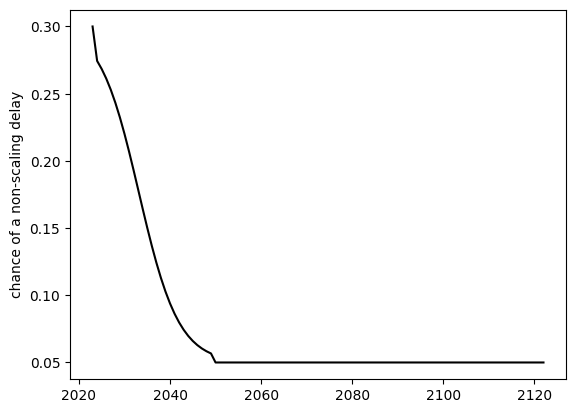

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2033

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.05356  | 1.081     | 2.633     | 9.079     |
| 5         | -0.03859  | 0.9436    | 9.997     | 9.179     |
| 8         | -0.03328  | 0.209     | 5.029     | 1.445     |
| 48        | -0.02809  | 0.01      | 6.661     | 1.286     |
Curve params found
{'push': 0.01, 'shift': 6.660738037217208, 'slope': 1.2862532687283248}
-
## Chance of nonscaling delay ##


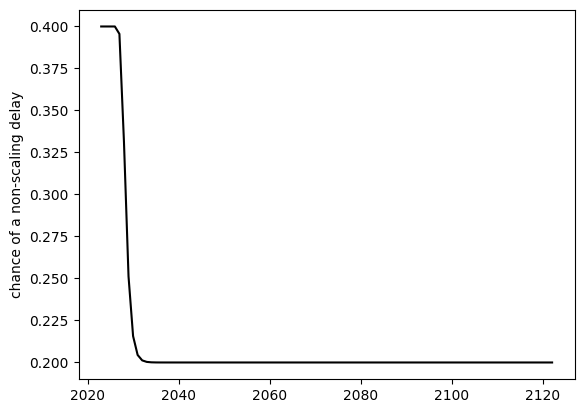

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.4),
                     (2030, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2001   | 7.135     | 3.883     | 8.983     |
| 3         | -0.1873   | 3.798     | 2.912     | 6.722     |
| 10        | -0.1388   | 1.828     | 7.475     | 7.174     |
| 21        | -0.1161   | 1.17      | 9.984     | 1.404     |
| 37        | -0.1022   | 0.4358    | 4.806     | 7.967     |
| 38        | -0.1      | 0.1778    | 4.245     | 7.502     |
| 42        | -0.1      | 0.01      | 5.04      | 4.879     |
| 51        | -0.1      | 0.01      | 3.753     | 3.026     |
| 77        | -0.1      | 0.03167   | 5.002     | 2.47      |
| 86        | -0.09998  | 0.01      | 4.012     | 2.11      |
| 118       | -0.07497  | 0.01      | 10.0      | 0.5669    |
| 119       | -0.06429  | 0.1668    | 9.85      | 0.241     |
Curve params found
{'push': 0.1668412394517336,
 'shift': 9.850436693040171,
 'slope': 0.24102668698860483}
-
## Chance of nonscalin

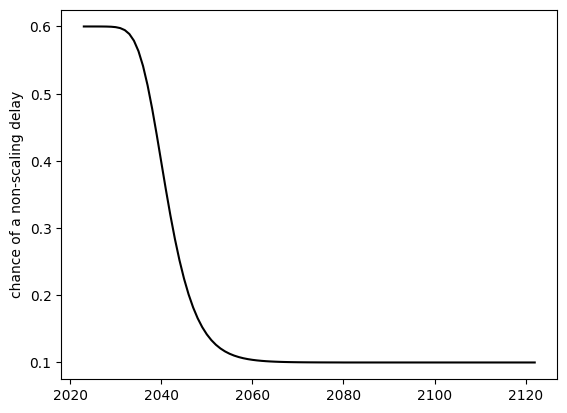

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2033

In [8]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Take off speeds

## Chance of nonscaling delay ##


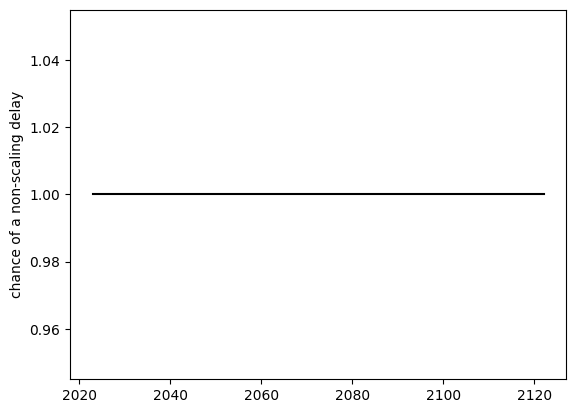

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%


In [9]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff

delays['take_off'] = {'prob': 1, 'length': sq.lognorm(1, 15)}
plot_nonscaling_delay(plt, years, lambda _: 1)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [10]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
